Total Graphs: 1113
PROTEINS(1113)
Graph object structure:
 Data(edge_index=[2, 26], x=[7, 3], y=[1])


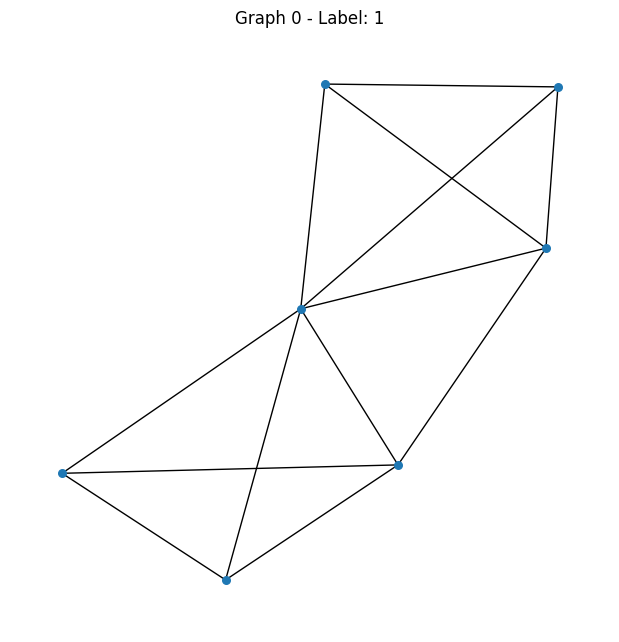

Node feature matrix shape: torch.Size([7, 3])
First 5 node features:
 tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Graph label: 1 (0: Non-Enzyme, 1: Enzyme)


In [1]:
from torch_geometric.datasets import TUDataset
import torch
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Load the PROTEINS dataset
dataset = TUDataset(root='data/PROTEINS', name='PROTEINS')
print(f"Total Graphs: {len(dataset)}")
print(dataset)

# Pick one sample graph
data = dataset[1101]
print("Graph object structure:\n", data)

# Visualize the graph structure
G = to_networkx(data, to_undirected=True)

plt.figure(figsize=(6, 6))
nx.draw(G, node_size=30, with_labels=False)
plt.title(f"Graph 0 - Label: {data.y.item()}")
plt.show()

print("Node feature matrix shape:", data.x.shape)
print("First 5 node features:\n", data.x[:5])
print("Graph label:", data.y.item(), "(0: Non-Enzyme, 1: Enzyme)")


C:\Users\Laplace\AppData\Local\Temp\ipykernel_50460\1589260137.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10")


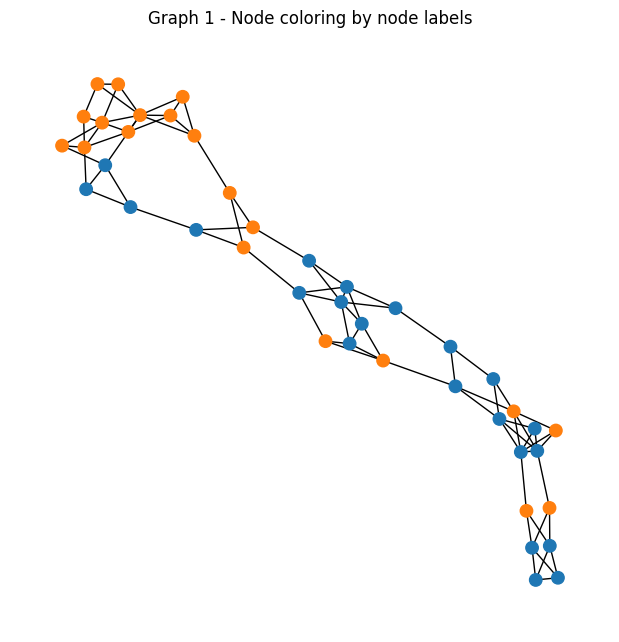

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os


root = 'data/PROTEINS/PROTEINS/raw'
node_labels_path = os.path.join(root, 'PROTEINS_node_labels.txt')
graph_indicator_path = os.path.join(root, 'PROTEINS_graph_indicator.txt')
edge_list_path = os.path.join(root, 'PROTEINS_A.txt')

node_labels = np.loadtxt(node_labels_path, dtype=int)
graph_indicator = np.loadtxt(graph_indicator_path, dtype=int)

first_graph_id = 1
node_indices = np.where(graph_indicator == first_graph_id)[0]

edges = np.loadtxt(edge_list_path, delimiter=',', dtype=int) - 1  # shift to 0-based

edges_first_graph = [
    (src, dst)
    for src, dst in edges
    if src in node_indices and dst in node_indices
]

G = nx.Graph()
G.add_edges_from(edges_first_graph)

subgraph_labels = node_labels[node_indices]

cmap = plt.cm.get_cmap("tab10")
colors = [cmap(lbl % 10) for lbl in subgraph_labels]
plt.figure(figsize=(6, 6))
nx.draw(
    G,
    node_color=colors,
    node_size=80,
    with_labels=False
)
plt.title("Graph 1 - Node coloring by node labels")
plt.show()


In [3]:
torch.cuda.is_available()

True